In [2]:
#library(e1071)
data("airquality")
mydata <- airquality
print(mydata)
mydata <- na.omit(mydata)
#print(summary(mydata))

    Ozone Solar.R Wind Temp Month Day
1      41     190  7.4   67     5   1
2      36     118  8.0   72     5   2
3      12     149 12.6   74     5   3
4      18     313 11.5   62     5   4
5      NA      NA 14.3   56     5   5
6      28      NA 14.9   66     5   6
7      23     299  8.6   65     5   7
8      19      99 13.8   59     5   8
9       8      19 20.1   61     5   9
10     NA     194  8.6   69     5  10
11      7      NA  6.9   74     5  11
12     16     256  9.7   69     5  12
13     11     290  9.2   66     5  13
14     14     274 10.9   68     5  14
15     18      65 13.2   58     5  15
16     14     334 11.5   64     5  16
17     34     307 12.0   66     5  17
18      6      78 18.4   57     5  18
19     30     322 11.5   68     5  19
20     11      44  9.7   62     5  20
21      1       8  9.7   59     5  21
22     11     320 16.6   73     5  22
23      4      25  9.7   61     5  23
24     32      92 12.0   61     5  24
25     NA      66 16.6   57     5  25
26     NA   

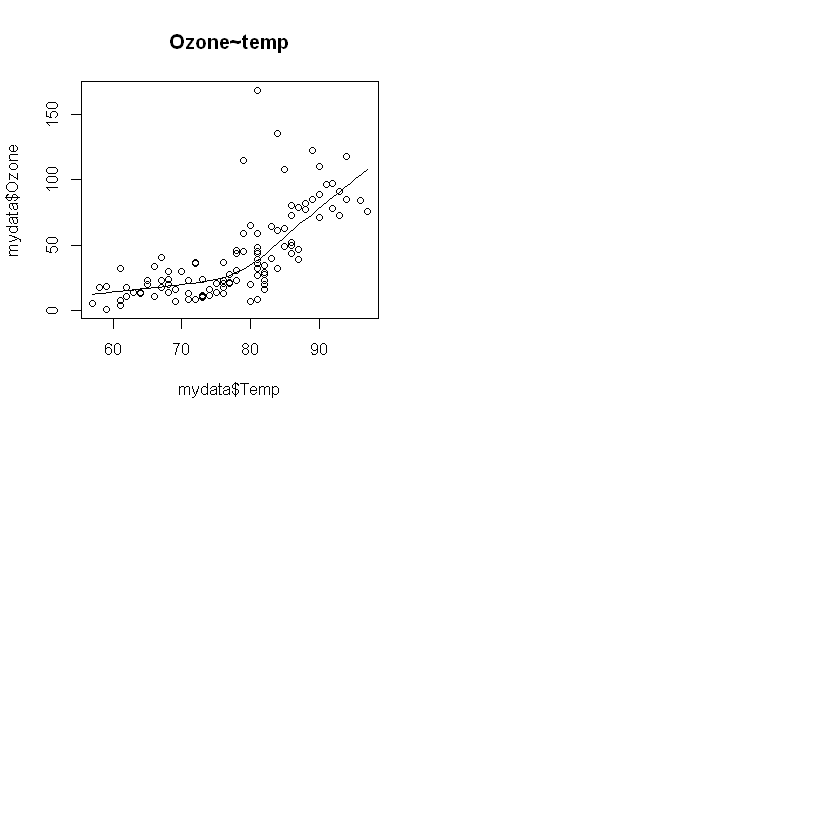

In [3]:
## Ozone(Y) Vs temp (x)
par(mfrow=c(2, 2))  
scatter.smooth(x=mydata$Temp,y=mydata$Ozone, main="Ozone~temp")

In [5]:
cr <- cor(mydata$Ozone, mydata$Temp)
print(cr)

[1] 0.6985414


In [6]:
linearMod <- lm(mydata$Ozone~ mydata$Temp, data=mydata) 
print(linearMod)



Call:
lm(formula = mydata$Ozone ~ mydata$Temp, data = mydata)

Coefficients:
(Intercept)  mydata$Temp  
   -147.646        2.439  



In [7]:
summary(linearMod)


Call:
lm(formula = mydata$Ozone ~ mydata$Temp, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.922 -17.459  -0.874  10.444 118.078 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -147.6461    18.7553  -7.872 2.76e-12 ***
mydata$Temp    2.4391     0.2393  10.192  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23.92 on 109 degrees of freedom
Multiple R-squared:  0.488,	Adjusted R-squared:  0.4833 
F-statistic: 103.9 on 1 and 109 DF,  p-value: < 2.2e-16


In [8]:
# Create Training and Test data -
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(mydata), 0.8*nrow(mydata))  # row indices for training data
trainingData <- mydata[trainingRowIndex, ]  # model training data
testData  <- mydata[-trainingRowIndex, ]   # test data

In [9]:
 # Build the model on training data -
linearMod2 <- lm(Ozone ~ Temp, data=mydata) 
distPred <- predict(linearMod2, testData)  # predict distance
print(distPred )

        1         4         7        12        13        29        40        49 
15.774291  3.578742 10.896071 20.652511 13.335181 49.921830 71.873819 10.896071 
       64        67        73        74        76        86        88        93 
49.921830 54.800050 30.408951 49.921830 47.482720 59.678270 62.117379 49.921830 
      105       108       111       122       137       152       153 
52.360940 40.165390 42.604500 86.508479 25.530731 37.726280 18.213401 


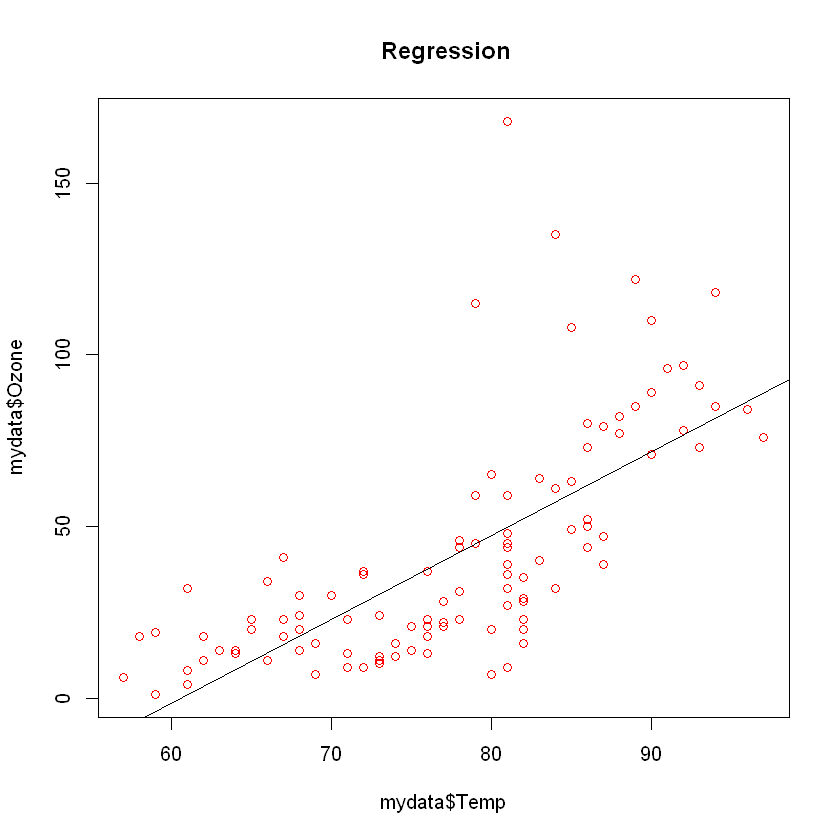

In [10]:
plot(mydata$Ozone ~ mydata$Temp,col = "red",main = " Regression")
abline(lm(mydata$Ozone ~ mydata$Temp))

In [11]:
cor(mydata$Ozone, mydata$Temp, method = "pearson", use = "complete.obs")

[1] 0.6985414

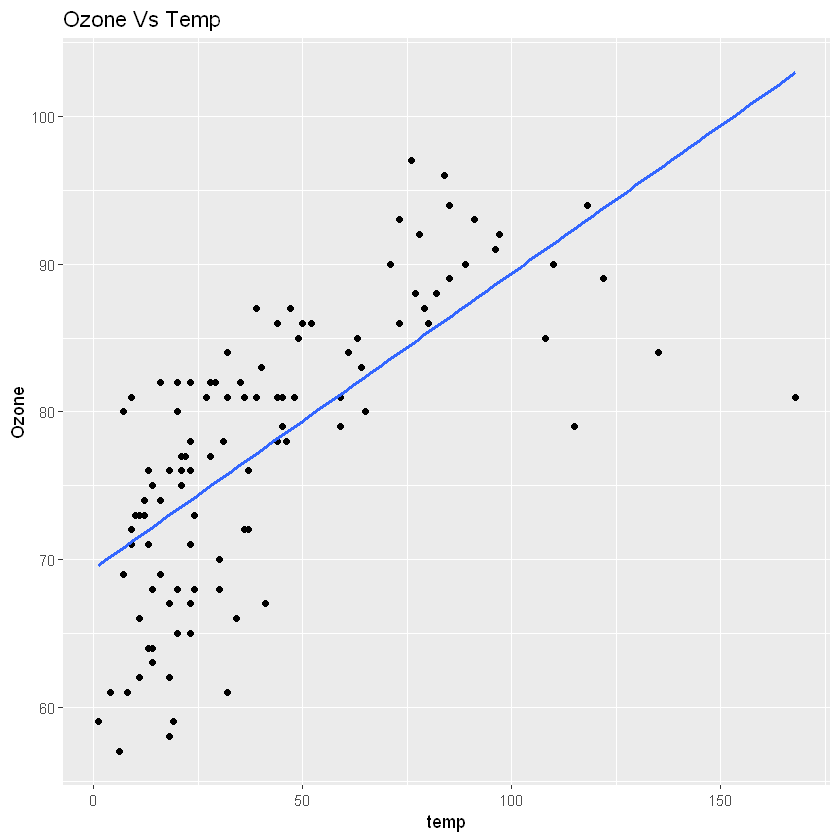

In [14]:
library(ggplot2)
ggplot(mydata, aes(Ozone,Temp)) + geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  ylab("Ozone") +
  xlab("temp") +
  ggtitle("Ozone Vs Temp")


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


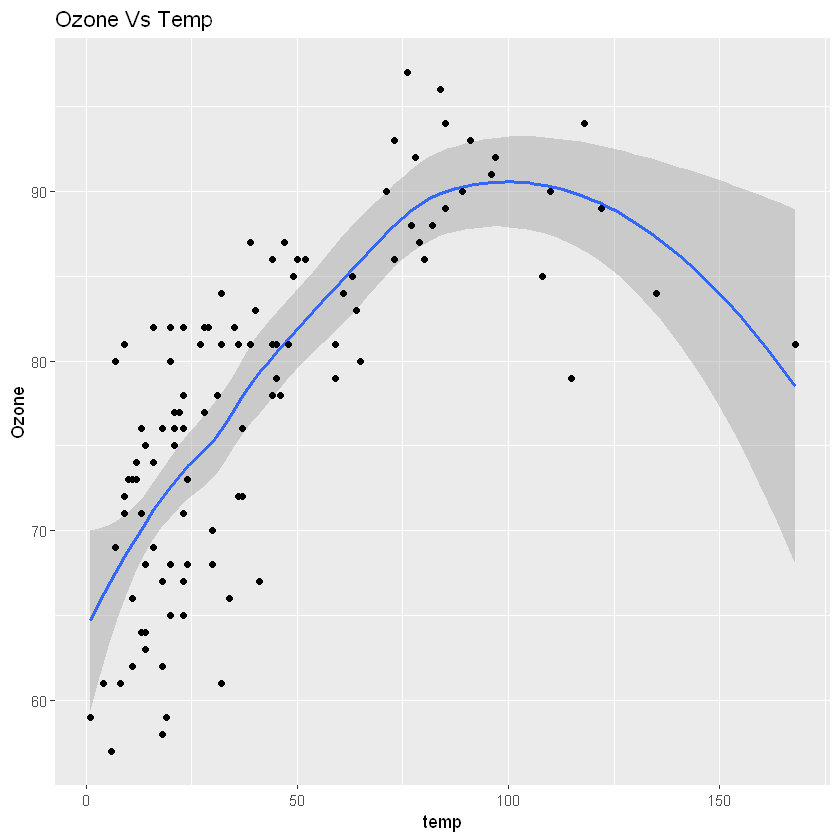

In [15]:
ggplot(mydata, aes(Ozone,Temp)) +
  stat_smooth() + geom_point() +
  ylab("Ozone") +
  xlab("temp") +
  ggtitle("Ozone Vs Temp")